In [3]:
#pip install pandas
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


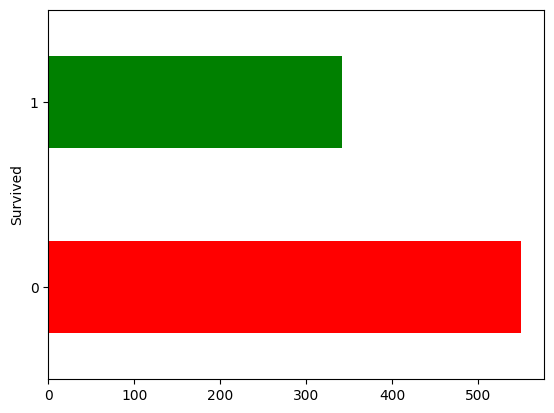

In [ ]:
# @title Survived
df.groupby('Survived').size().plot(kind='barh', color=['r','g'])
plt.gca().spines[:].set_visible(True)

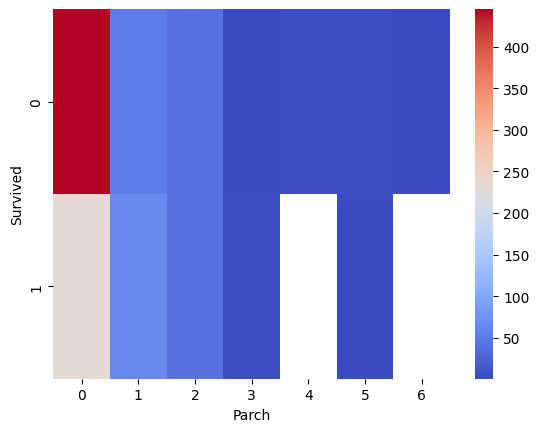

In [ ]:
# @title Survived by parch

df_2dhist = pd.DataFrame({
    x_label: grp['Survived'].value_counts()
    for x_label, grp in df.groupby('Parch')
})
sns.heatmap(df_2dhist, cmap='coolwarm')
plt.xlabel('Parch')
_ = plt.ylabel('Survived')

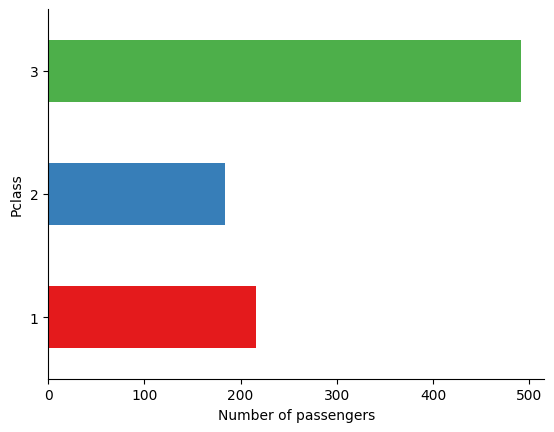

In [ ]:
#@title Class
df.groupby('Pclass').size().plot(kind='barh',xlabel='Number of passengers', color=sns.palettes.mpl_palette('Set1'))
plt.gca().spines[['top', 'right',]].set_visible(False)

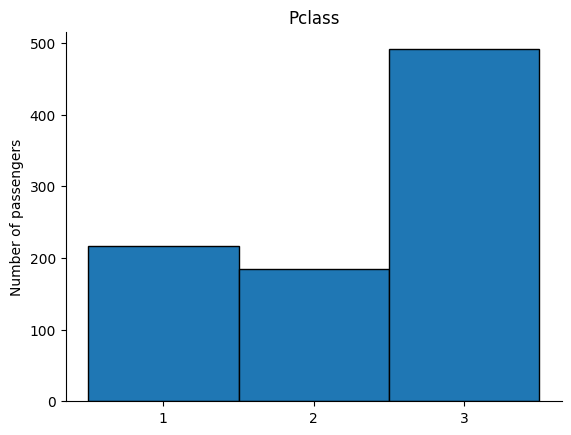

In [ ]:
#@title Passengers by class
from matplotlib import pyplot as plt
df['Pclass'].plot(kind='hist', bins=3, title='Pclass', ylabel='Number of passengers', ec='black', range=(1,4),align='left').set_xticks(range(1,4,1))
plt.gca().spines[['top', 'right',]].set_visible(False)

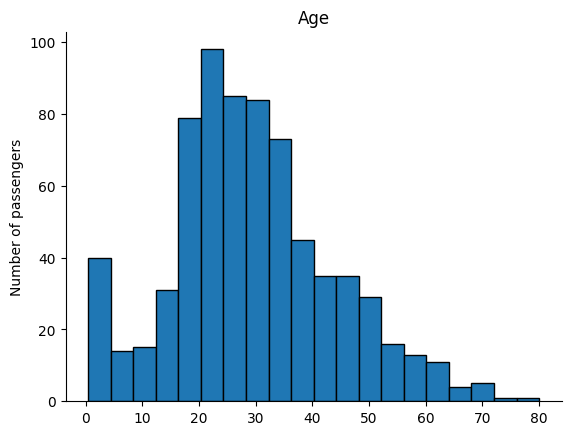

In [ ]:
# @title Age

df['Age'].plot(kind='hist', bins=20, title='Age',ylabel='Number of passengers', ec='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

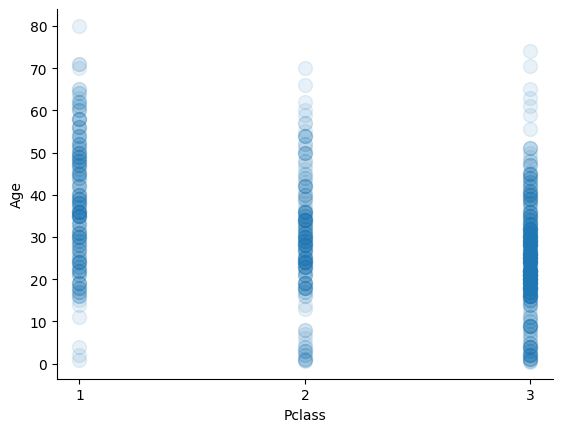

In [ ]:
# @title Age by class
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Pclass', y='Age', s=100, alpha=.1).set_xticks(range(1,4,1))
plt.gca().spines[['top', 'right',]].set_visible(False)

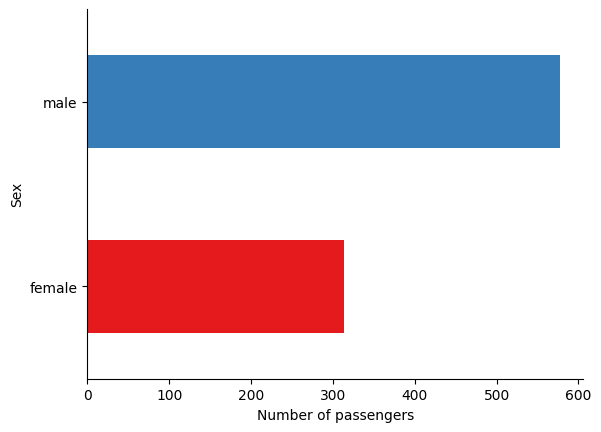

In [ ]:
#@title Sex
df.groupby('Sex').size().plot(kind='barh', xlabel='Number of passengers', color=sns.palettes.mpl_palette('Set1'))
plt.gca().spines[['top', 'right',]].set_visible(False)

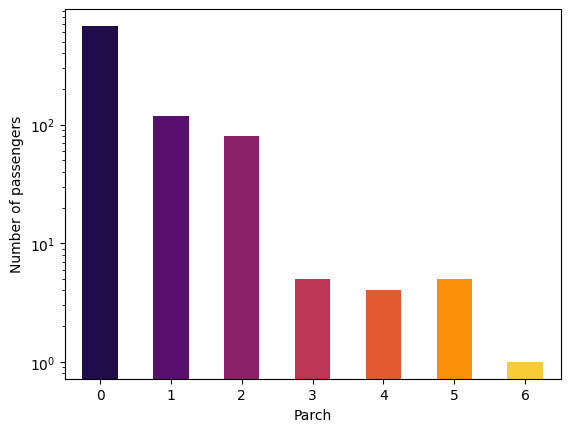

In [32]:
#@title Parch
df.groupby('Parch').size().plot(kind='bar', ylabel='Number of passengers', color=sns.mpl_palette('inferno', 7))
plt.xticks(rotation=0)
plt.yscale('log')
plt.gca().spines[:].set_visible(True)

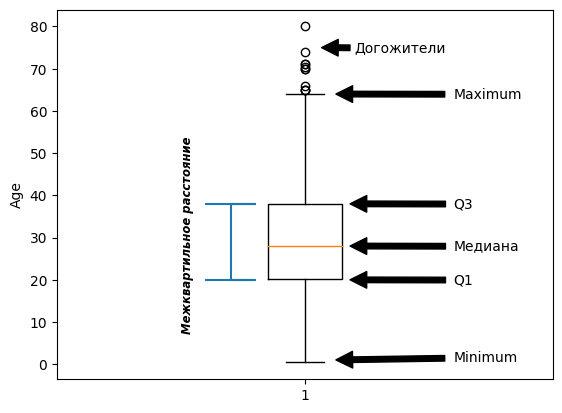

In [ ]:
#@title Ящик с усами
x = df.Age.dropna()
fig, ax = plt.subplots()
ax.boxplot(x);
ax.set_ylabel('Age')
ax.annotate('Догожители', xy=(1.03, 75), xytext=(1.1, 74),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Maximum', xy=(1.05, 64), xytext=(1.3, 63),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Minimum', xy=(1.05, 1), xytext=(1.3, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Q1', xy=(1.08, 20), xytext=(1.3, 19),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Q3', xy=(1.08, 38), xytext=(1.3, 37),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Медиана', xy=(1.08, 28), xytext=(1.3, 27),
            arrowprops=dict(facecolor='black', shrink=0.05))
p=[(0.8,20),(0.9,20),(0.85,20),(0.85,38),(0.9,38),(0.8,38)]
ax.plot(*zip(*p))
ax.text(0.75,8,'Межквартильное расстояние', rotation='vertical', size='small', style='oblique', weight=1000)
plt.show()

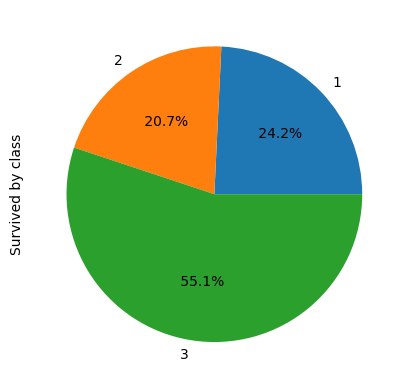

In [ ]:
#@title Пирог
df.groupby('Pclass')['Survived'].size().plot(kind='pie', autopct= ' %1.1f%%', ylabel='Survived by class')
plt.show()

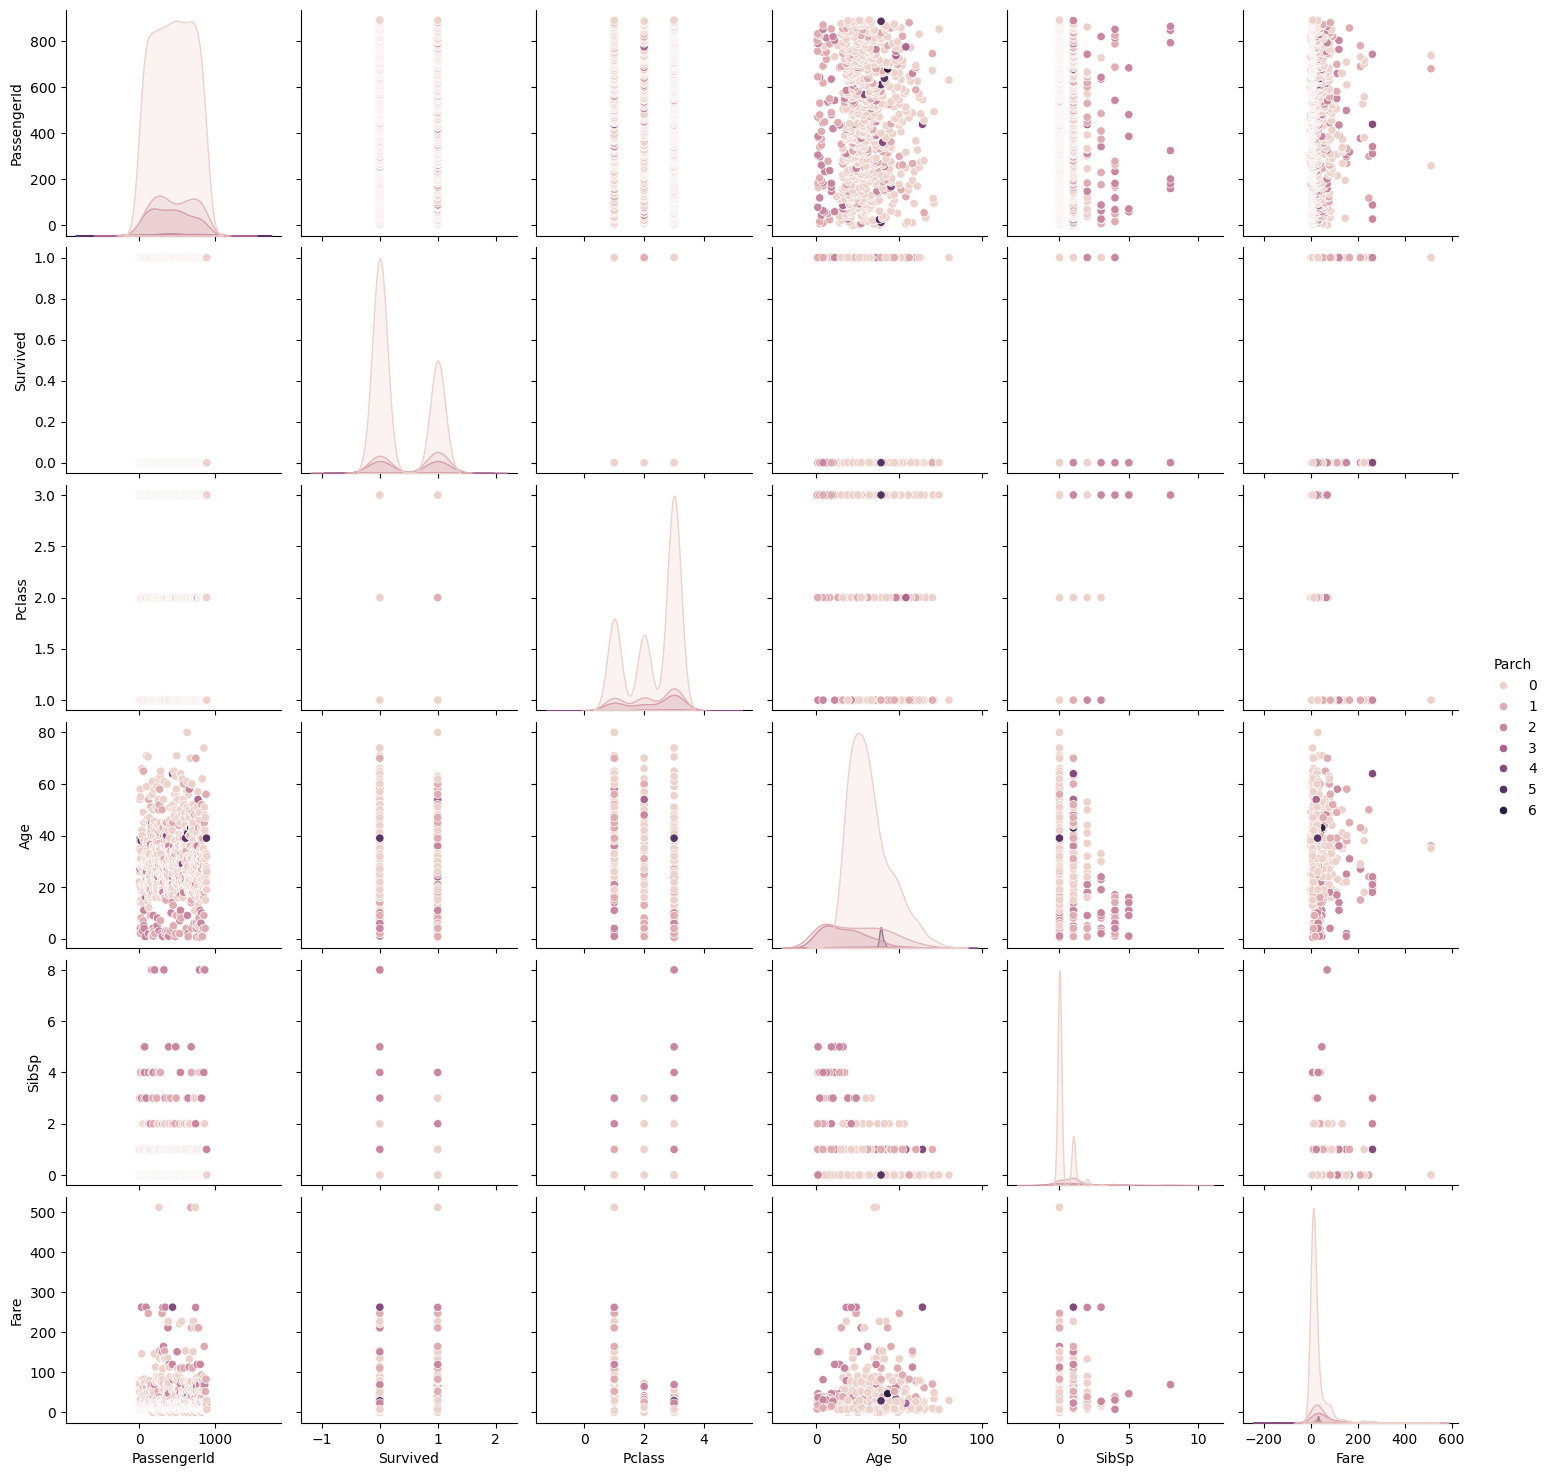

In [4]:
#@title Pairplot by parch
sns.pairplot(df, hue='Parch');

In [19]:
#@title Интерактивный sunburst plot
a=df.PassengerId.size
Pas=pd.DataFrame()
Pas['Class']=df['Pclass']
b=Pas.groupby('Class', sort=True).size()
Pas['Sex']=df['Sex']
c=Pas.groupby('Class', sort=True).value_counts()

data = dict(
    categories = ['Total',
                  '1st Class', '2nd Class', '3rd Class',
                  'males', 'females',
                  'males ', 'females ',
                  'males  ', 'females  '],
    parent = ['', 'Total', 'Total', 'Total', '1st Class', '1st Class', '2nd Class', '2nd Class', '3rd Class','3rd Class'],
    value = [df.PassengerId.size, b[1], b[2], b[3], c[1].male, c[1].female, c[2].male, c[2].female, c[3].male, c[3].female]
)
fig = px.sunburst(data, names='categories', parents='parent', values = 'value', branchvalues='total')
fig.show()
